In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC,SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris virginica

In [3]:
svm_clf = Pipeline([
  ("scaler",StandardScaler()),
  ("linear_svc",  LinearSVC(C =1,loss = "hinge")),
])

In [4]:
svm_clf.fit(X,y)

,steps,"[('scaler', ...), ('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001


In [5]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [6]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [7]:
X,y = make_moons(n_samples = 100, noise =0.15,random_state = 42)

In [8]:
polynomial_svm_clf = Pipeline([
  ('poly_features',PolynomialFeatures(degree =3)),
  ('scaler',StandardScaler()),
  ('svm_clf',LinearSVC(C = 10,loss = 'hinge'))
])
polynomial_svm_clf.fit(X,y)

c:\Python3.13\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,steps,"[('poly_features', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


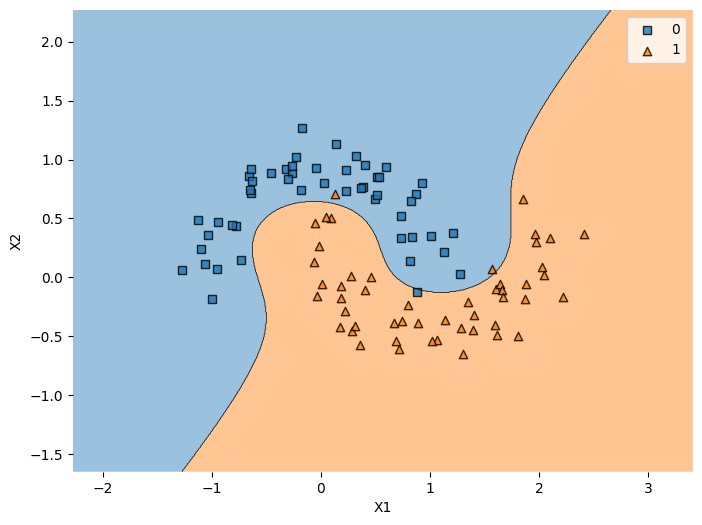

In [9]:
plt.figure(figsize = (8,6))
plot_decision_regions(X, y, clf=polynomial_svm_clf, legend=2)
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

In [10]:
rbf_kernel_svm_clf1 = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf1.fit(X, y)

rbf_kernel_svm_clf2 = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.001))
])
rbf_kernel_svm_clf2.fit(X, y)

rbf_kernel_svm_clf3 = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1000))
])
rbf_kernel_svm_clf3.fit(X, y)

rbf_kernel_svm_clf4 = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
])
rbf_kernel_svm_clf4.fit(X, y)




,steps,"[('scaler', ...), ('svm_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1000
,kernel,'rbf'
,degree,3
,gamma,5


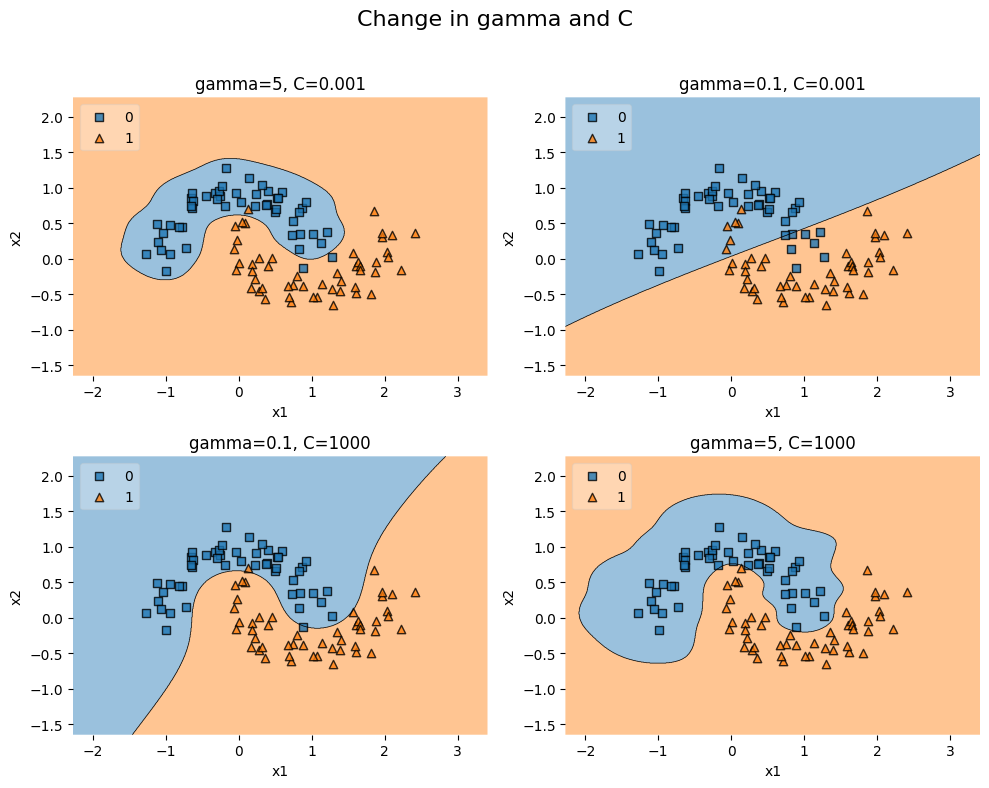

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Top-left plot
plot_decision_regions(X, y, clf=rbf_kernel_svm_clf1, legend=2, ax=axes[0, 0])
axes[0, 0].set_title('gamma=5, C=0.001')
axes[0, 0].set_xlabel('x1')
axes[0, 0].set_ylabel('x2')

# Top-right plot
plot_decision_regions(X, y, clf=rbf_kernel_svm_clf2, legend=2, ax=axes[0, 1])
axes[0, 1].set_title('gamma=0.1, C=0.001')
axes[0, 1].set_xlabel('x1')
axes[0, 1].set_ylabel('x2')

# Bottom-left plot
plot_decision_regions(X, y, clf=rbf_kernel_svm_clf3, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('gamma=0.1, C=1000')
axes[1, 0].set_xlabel('x1')
axes[1, 0].set_ylabel('x2')

# Bottom-right plot
plot_decision_regions(X, y, clf=rbf_kernel_svm_clf4, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('gamma=5, C=1000')
axes[1, 1].set_xlabel('x1')
axes[1, 1].set_ylabel('x2')

fig.suptitle('Change in gamma and C', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()